# Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import os
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing the Data

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
os.listdir(data_dir)

['roses', 'LICENSE.txt', 'sunflowers', 'dandelion', 'tulips', 'daisy']

/root/.keras/datasets/flower_photos/sunflowers/7012366081_019c8a17a4_m.jpg


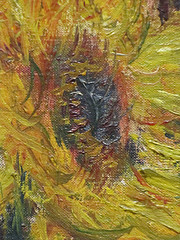

In [5]:
sunflowers = list(data_dir.glob("sunflowers/*"))
print(sunflowers[10])
PIL.Image.open(sunflowers[10])

In [6]:
img_height, img_width = 150, 150
batch_size = 32 

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    label_mode="categorical",
    seed = 123, 
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    label_mode="categorical",
    seed = 123, 
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

# Training the Model

In [12]:
resnet_model = Sequential()

pre_trained_model = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape = (img_height, img_width, 3),
    pooling = "avg",
    classes = 5, 
    weights = "imagenet"
)

for layer in pre_trained_model.layers:
  layer.trainable = False

resnet_model.add(pre_trained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(5, activation="softmax"))

resnet_model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 23,850,629
Trainable params: 262,917
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
resnet_model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
92/92 [==============================] - 294s 3s/step - loss: 0.7461 - accuracy: 0.7551 - val_loss: 0.4578 - val_accuracy: 0.8297
Epoch 2/10
92/92 [==============================] - 289s 3s/step - loss: 0.3131 - accuracy: 0.8879 - val_loss: 0.3763 - val_accuracy: 0.8665
Epoch 3/10
92/92 [==============================] - 288s 3s/step - loss: 0.2017 - accuracy: 0.9309 - val_loss: 0.4137 - val_accuracy: 0.8583
Epoch 4/10
92/92 [==============================] - 287s 3s/step - loss: 0.1314 - accuracy: 0.9578 - val_loss: 0.3396 - val_accuracy: 0.8815
Epoch 5/10
92/92 [==============================] - 287s 3s/step - loss: 0.0758 - accuracy: 0.9819 - val_loss: 0.3625 - val_accuracy: 0.8787
Epoch 6/10
92/92 [==============================] - 288s 3s/step - loss: 0.0527 - accuracy: 0.9894 - val_loss: 0.3639 - val_accuracy: 0.8896
Epoch 7/10
92/92 [==============================] - 286s 3s/step - loss: 0.0315 - accuracy: 0.9969 - val_loss: 0.3862 - val_accuracy: 0.8774
Epoch 8/10
92

In [20]:
resnet_model.save("ResNet.h5")

In [15]:
import pandas as pd

loss_df = pd.DataFrame(resnet_model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.746142,0.755109,0.457849,0.829700
1,0.313084,0.887943,0.376273,0.866485
2,0.201740,0.930858,0.413707,0.858311
3,0.131391,0.957766,0.339637,0.881471
4,0.075798,0.981948,0.362499,0.878747


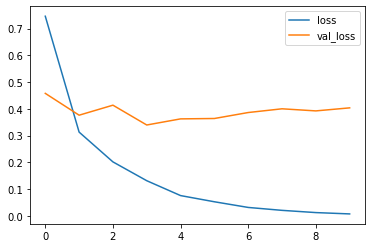

In [16]:
loss_df[['loss', 'val_loss']].plot()

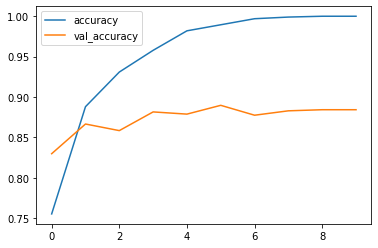

In [17]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [22]:
import cv2 

test_img = cv2.imread('test_rose.jpeg')
test_img.shape

(1059, 1600, 3)

In [27]:
test_img = cv2.resize(test_img, (150, 150))
test_img = test_img.reshape((1, 150, 150, 3))
test_img.shape

(1, 150, 150, 3)

In [29]:
prediction = resnet_model.predict(test_img)
prediction

array([[4.4548013e-10, 4.9174883e-11, 9.9999952e-01, 4.5083841e-08,
        4.6959894e-07]], dtype=float32)

In [30]:
import numpy as np
np.argmax(prediction)

2

In [31]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']